# Summary Statistics Plots

In [1]:
!pwd

/home/michael/dev/data-portal-summary-stats/notebook


In [5]:
import os
homepath = os.path.join(os.path.expanduser("~"), 'dev/hca-summary-stats')
os.chdir(homepath)
import scanpy as sc
import numpy as np
import requests
import time
from src.matrix_summary_stats import MatrixSummaryStats

In [7]:
sc.settings.set_figure_params(dpi=200)

In [24]:
mtxfile = 'test/data/mtxfile_processed.mtx/'

In [51]:
adata = sc.read_10x_mtx(mtxfile, # the directory with the `.mtx` file
        var_names='gene_symbols',    # use gene symbols for variable names (variables-axis index)
        cache=True)
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [52]:
adata

AnnData object with n_obs × n_vars = 2544 × 63925 
    var: 'gene_ids'

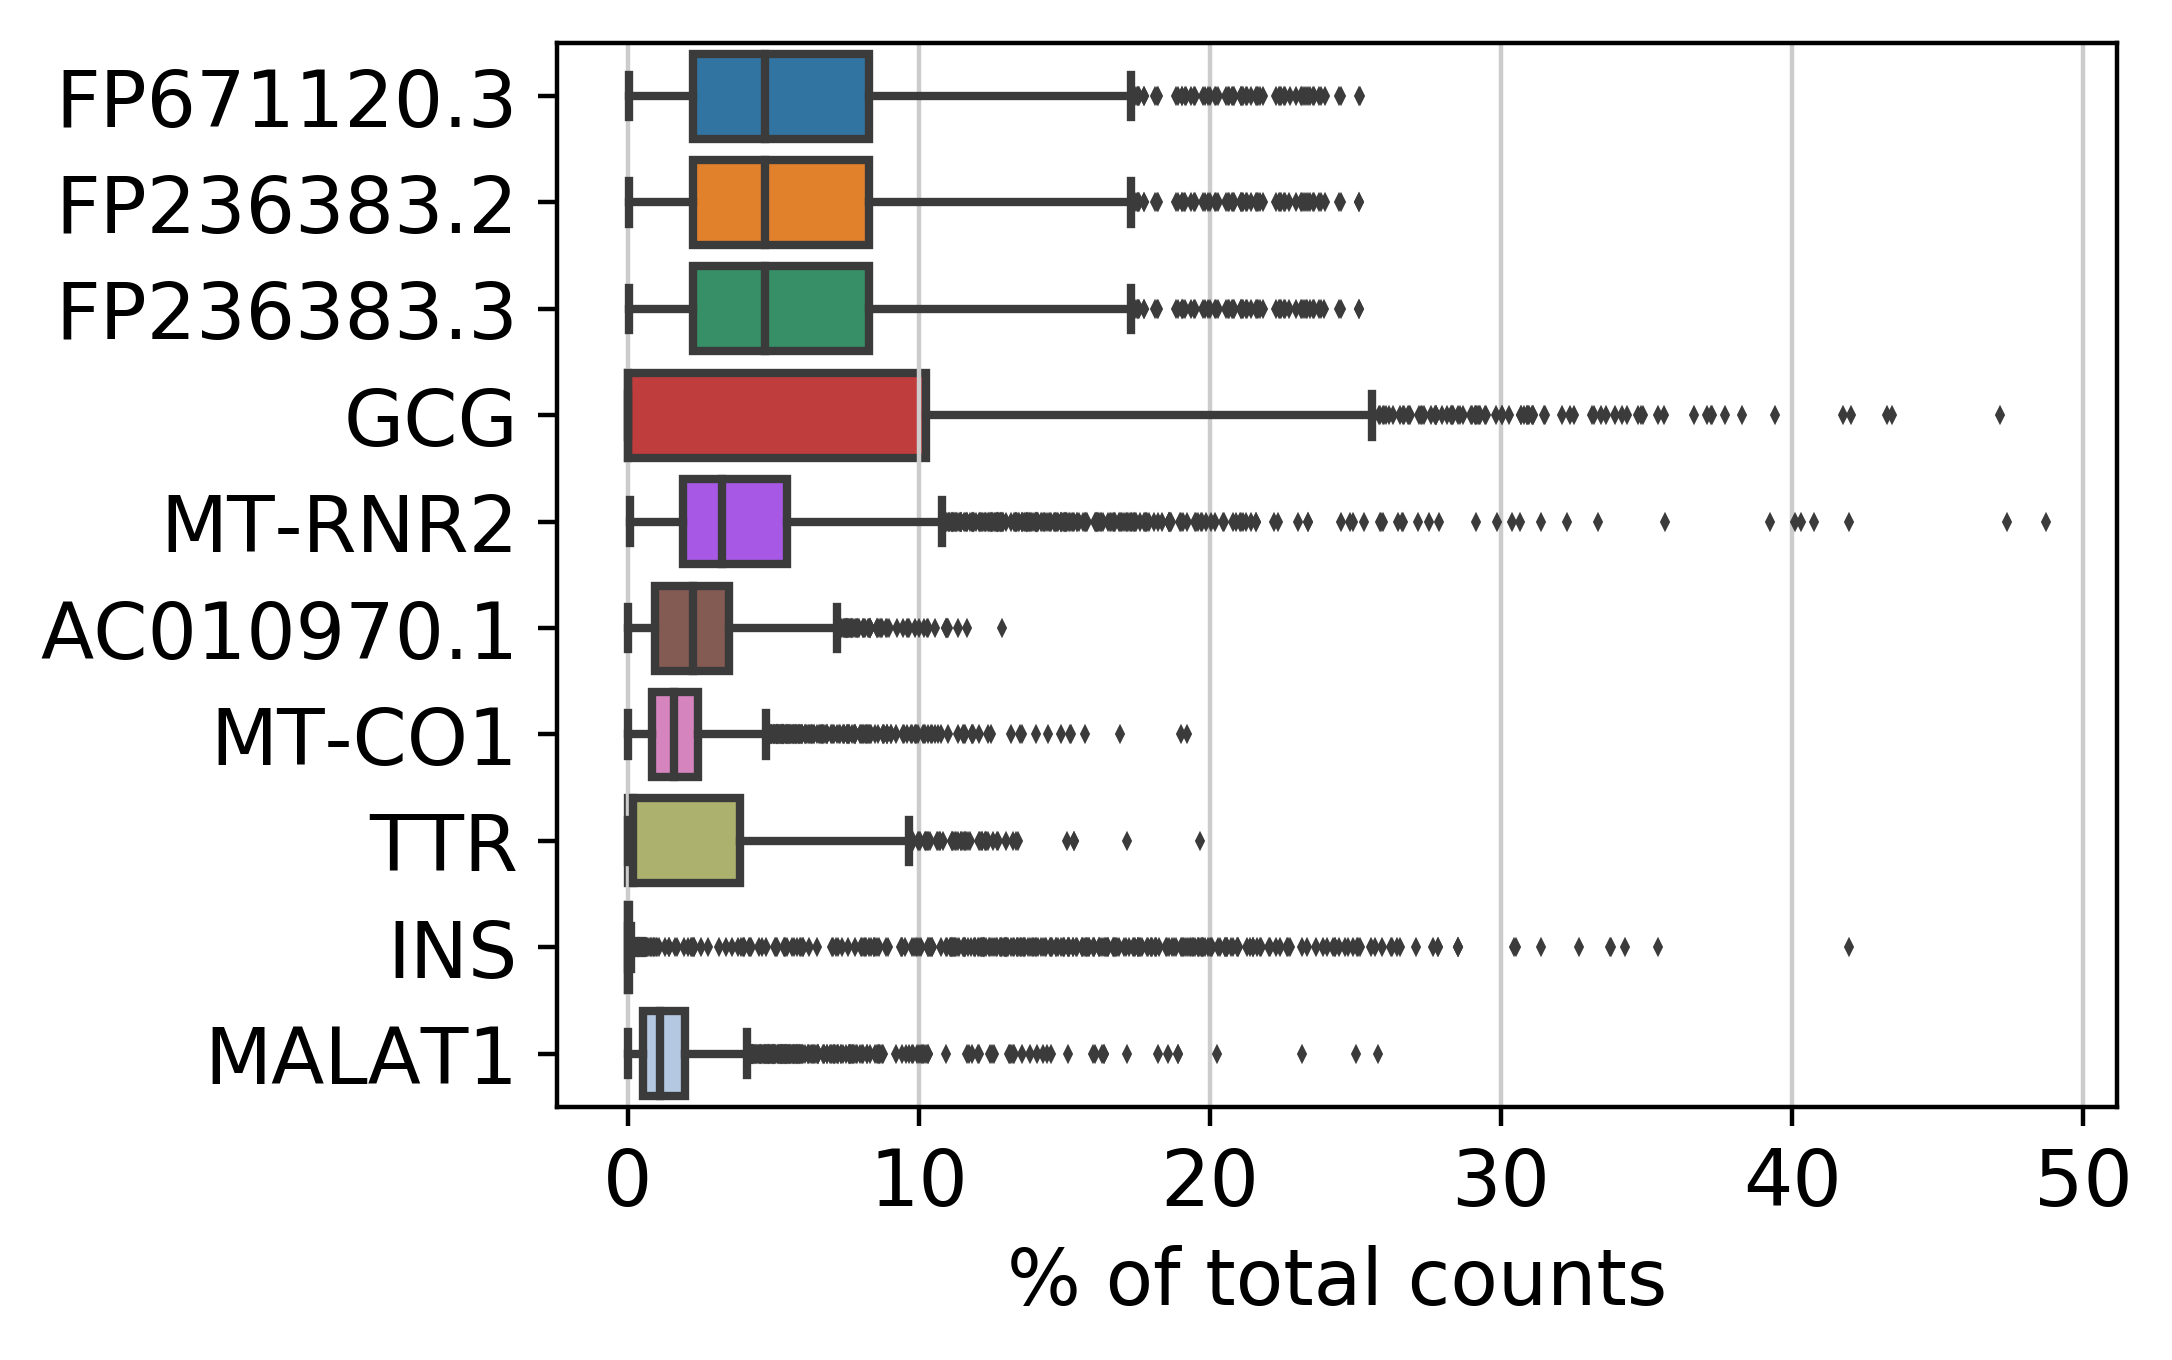

In [53]:
sc.pl.highest_expr_genes(adata, n_top=10)

In [54]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=20)

In [55]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

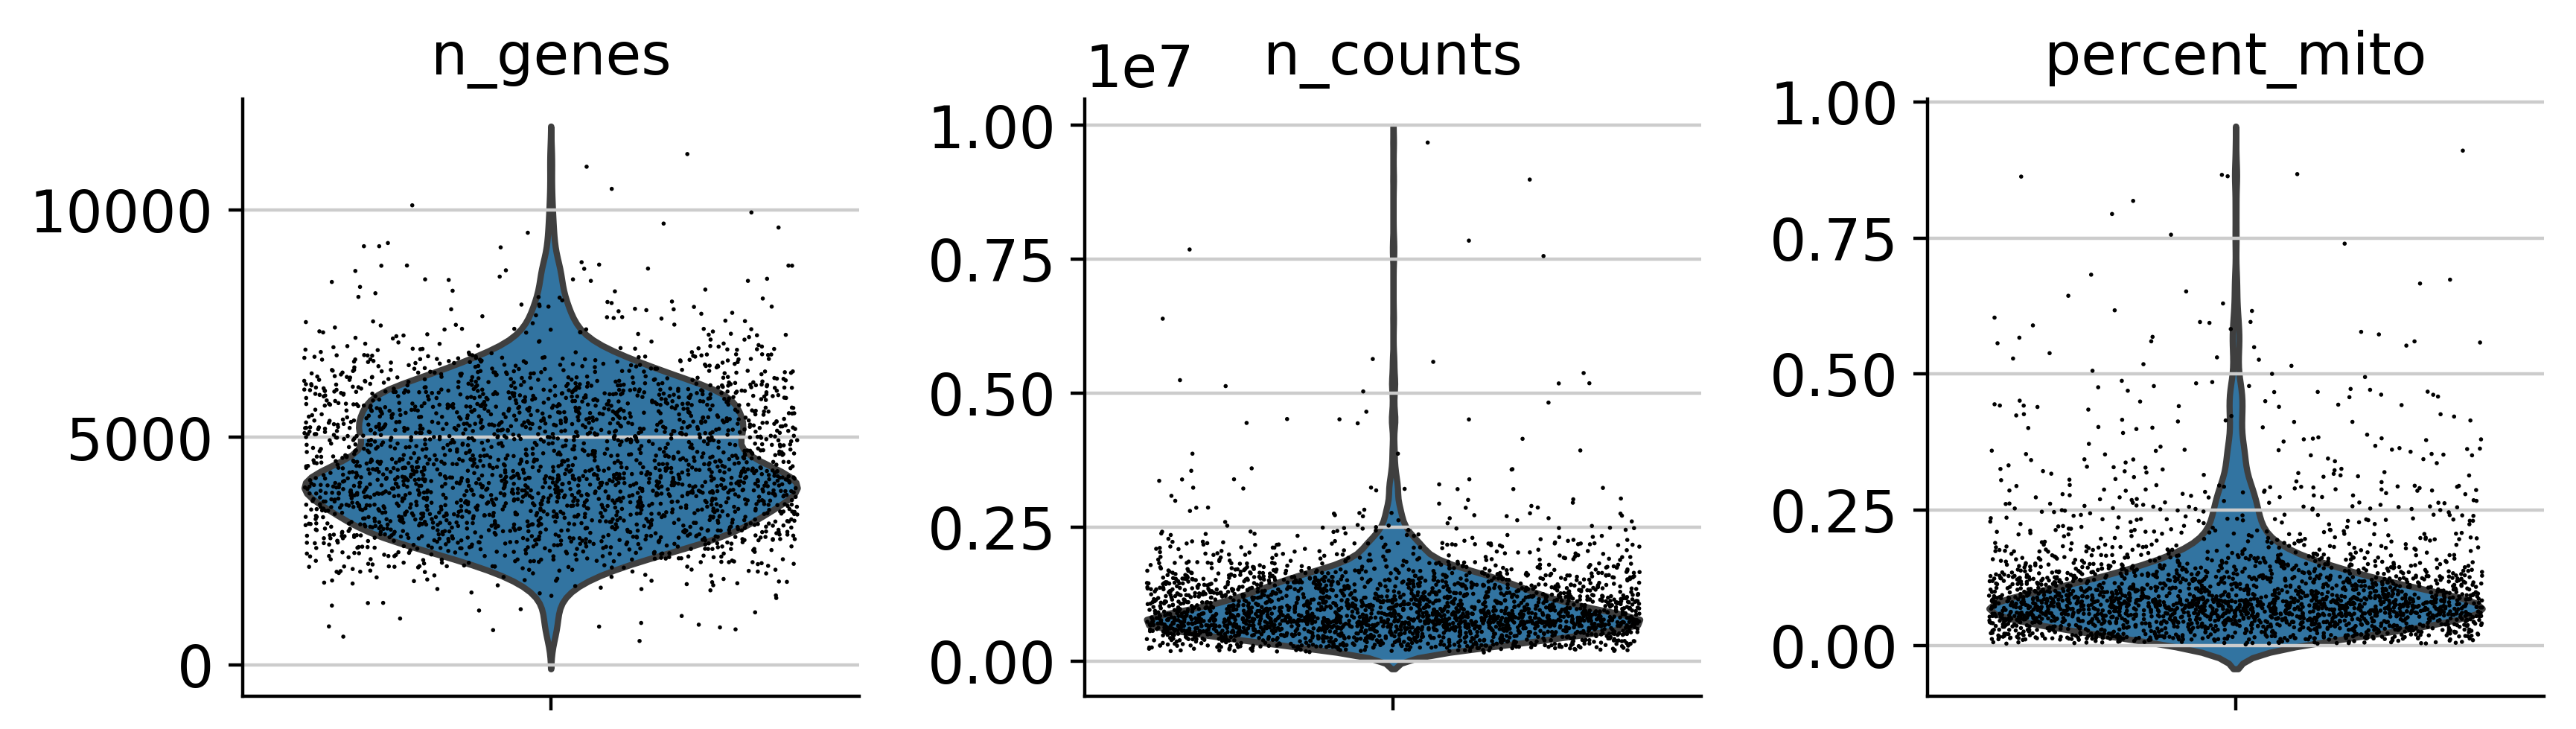

In [56]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

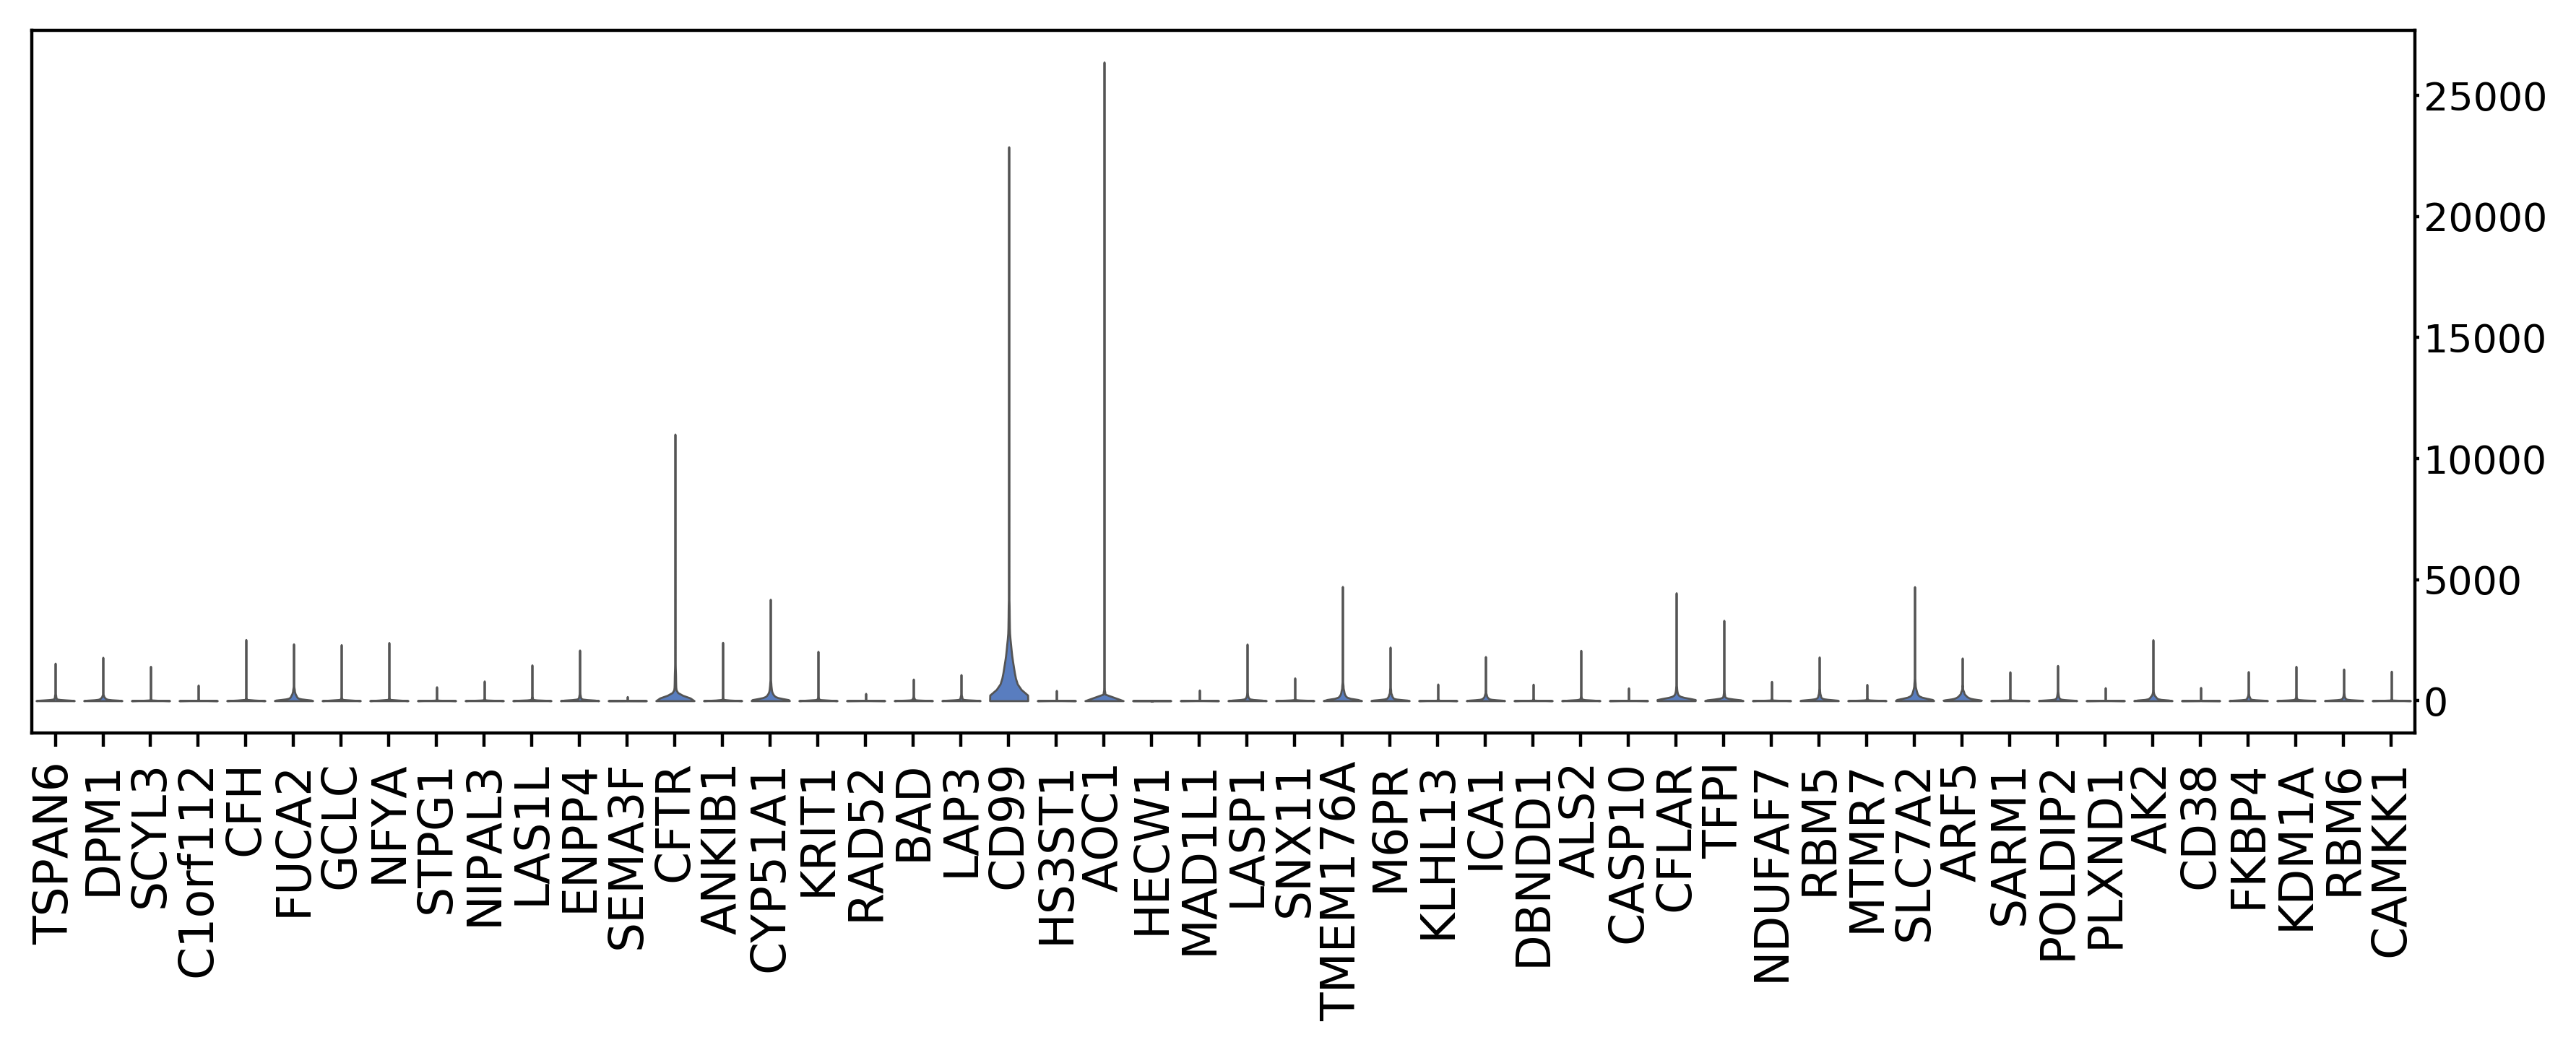

In [58]:
#adata.var_keys()
group_key = adata.obs['n_genes']
sc.pl.stacked_violin(adata, list(adata.var_names)[:50], swap_axis=True)
#sc.pl.stacked_violin(adata[:10], expression_variance, grouby=group_key, swap_axis=True, use_raw=False)

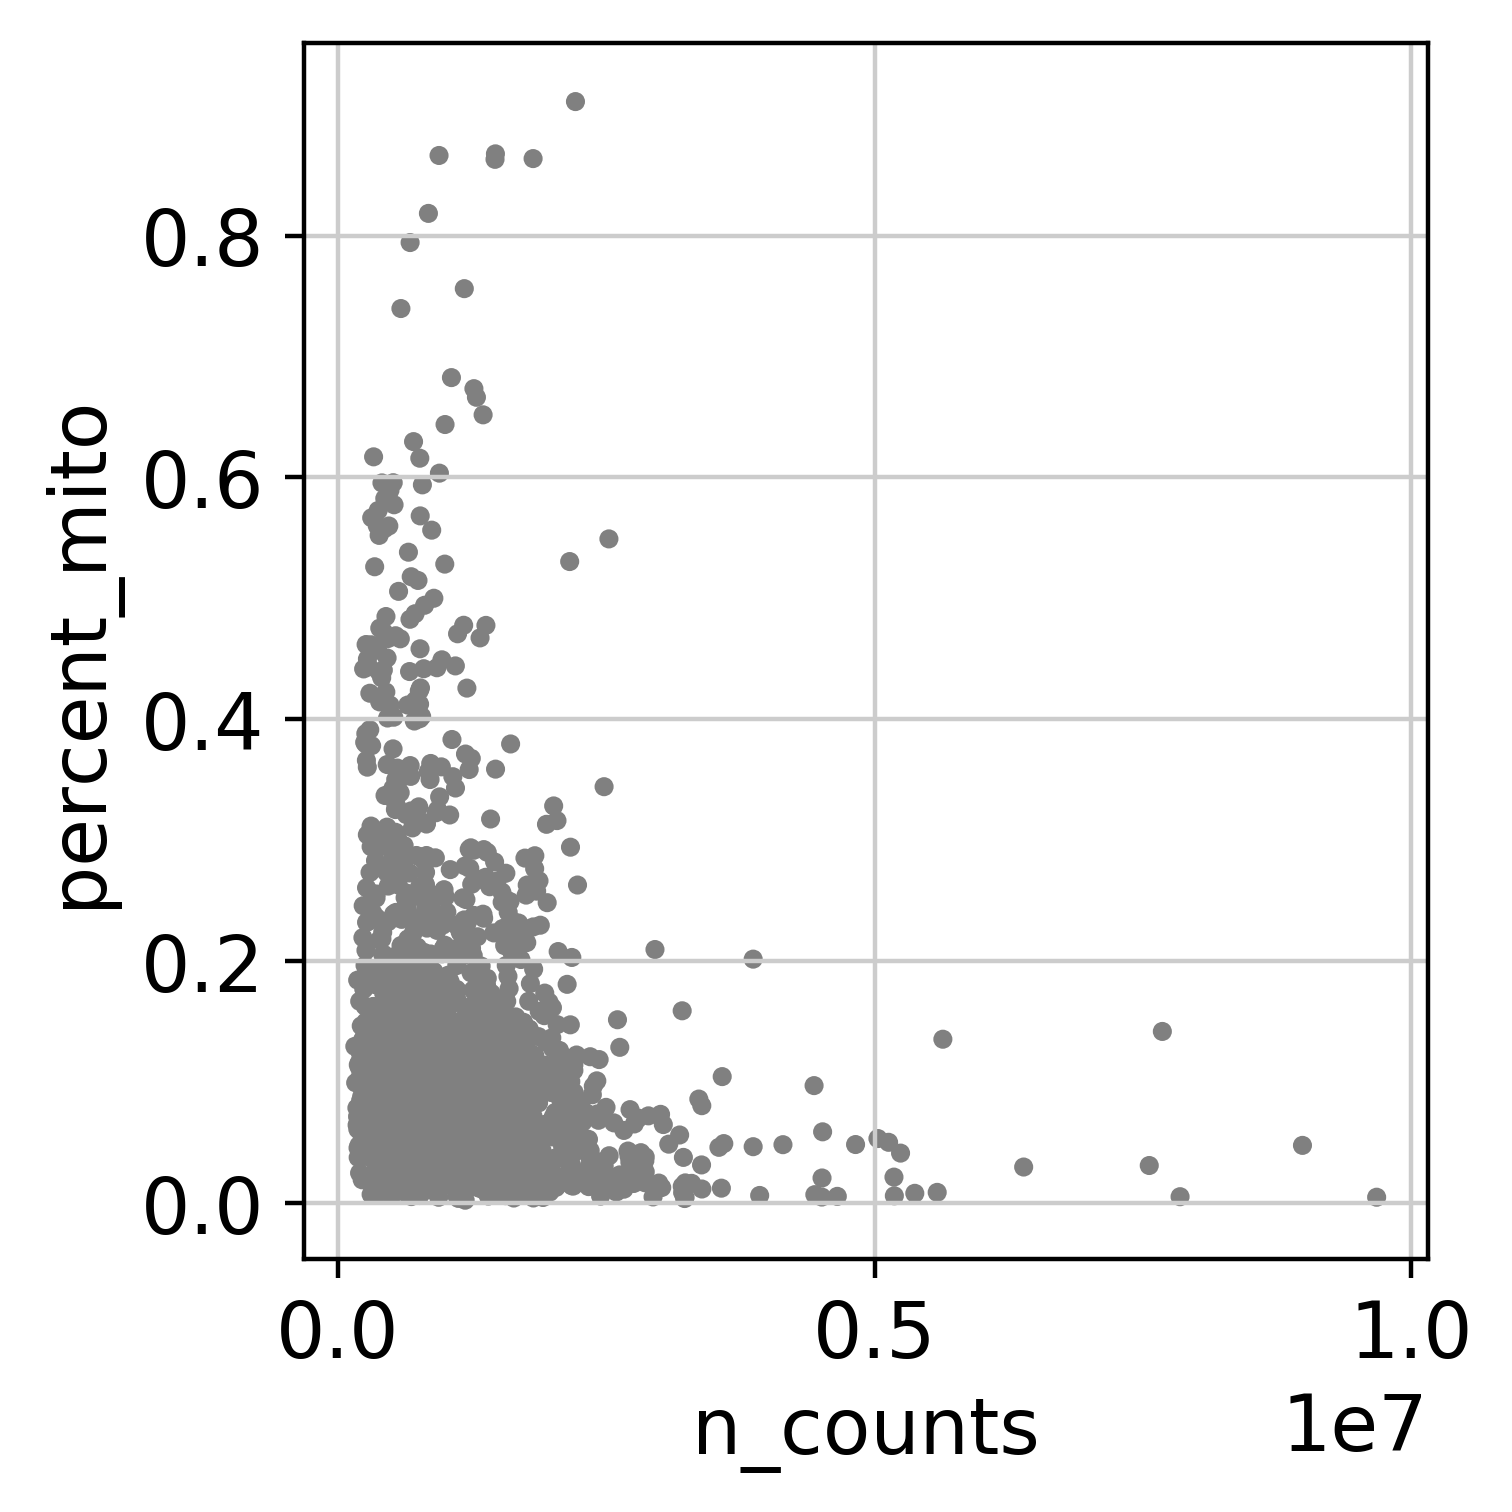

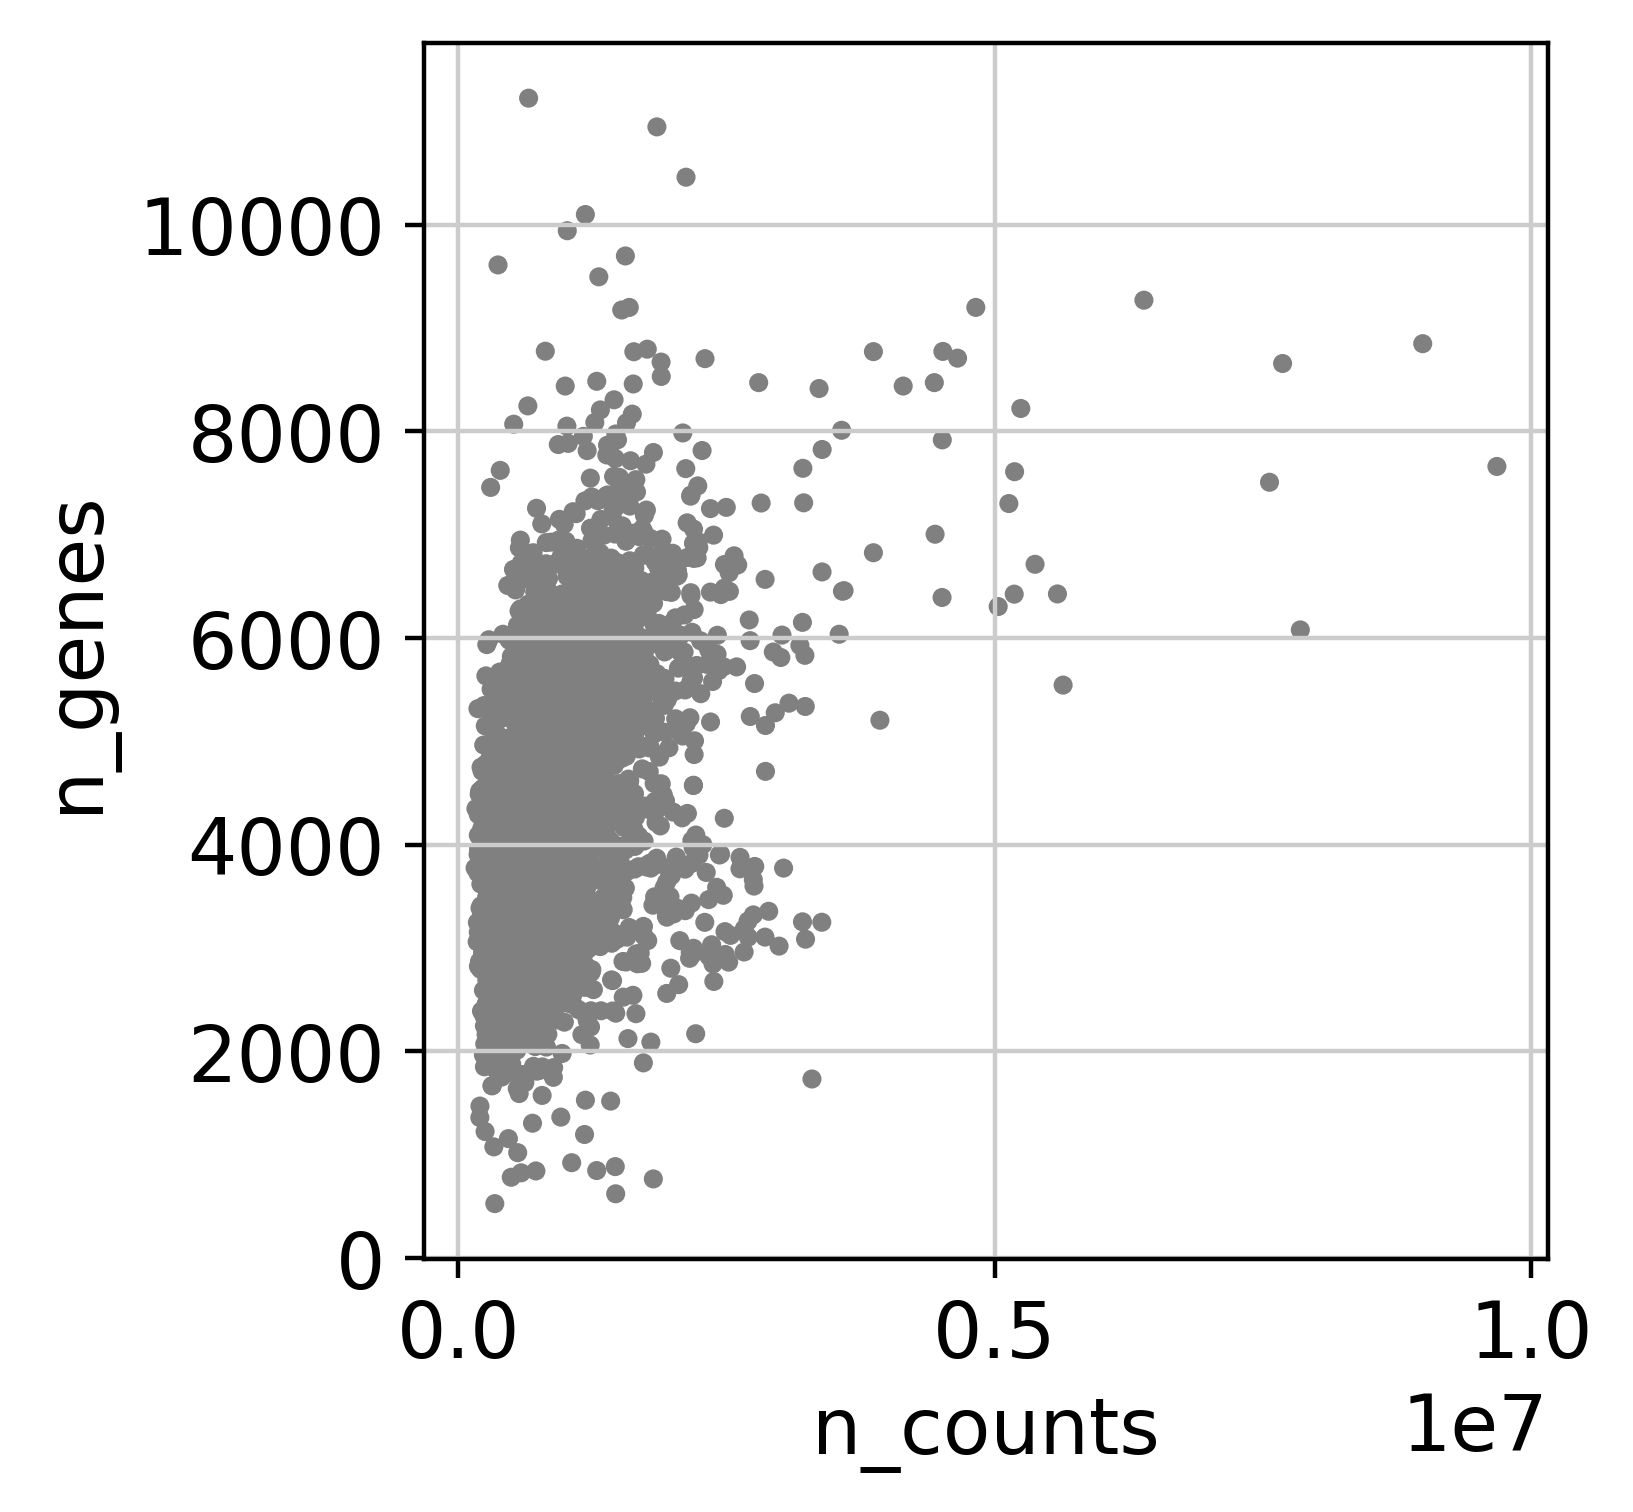

In [59]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [ ]:
adata

In [60]:
adata = adata[adata.obs['n_genes'] < 2500, :]
adata = adata[adata.obs['percent_mito'] < 0.05, :]

In [61]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)  # logarithmize
adata.raw = adata   # save raw data for later use

Trying to set attribute `.obs` of view, making a copy.


### Identify highly variable genes.

In [62]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

/home/michael/dev/data-portal-summary-stats/.venv/lib/python3.6/site-packages/scanpy/preprocessing/_highly_variable_genes.py:116: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


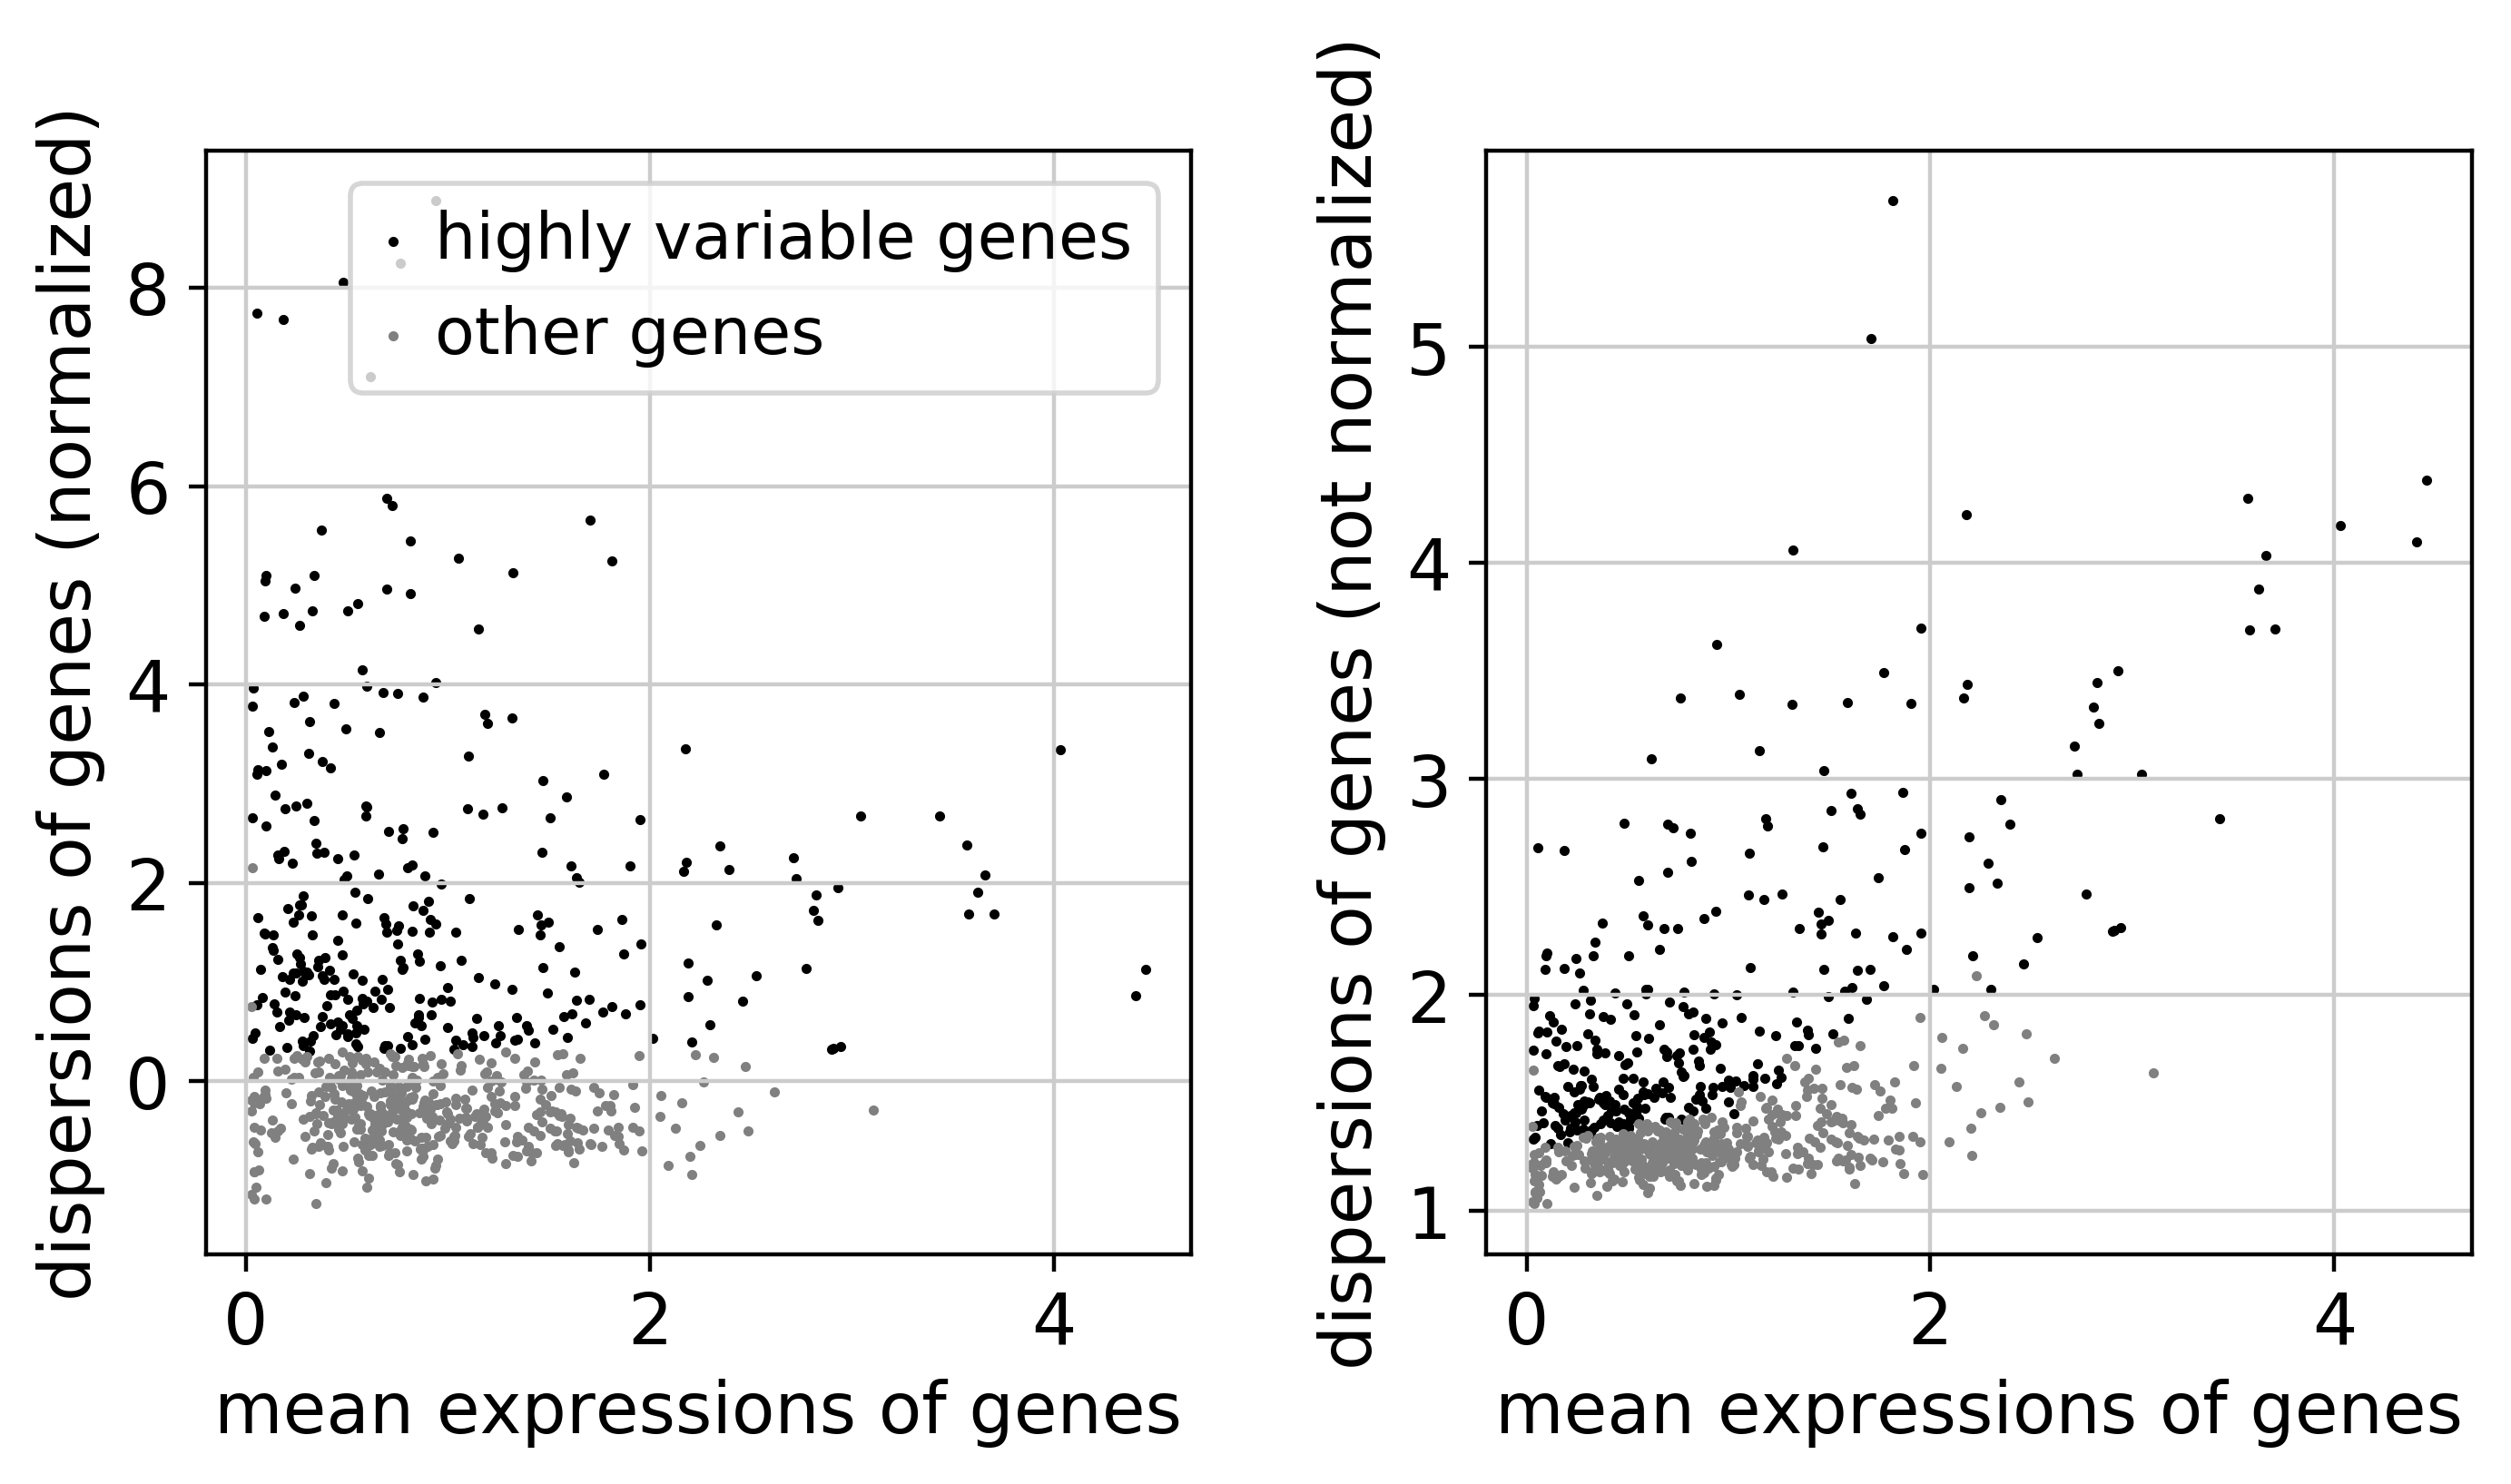

In [63]:
adata = sc.datasets.pbmc68k_reduced()  # scanpy demo data
sc.pl.highly_variable_genes(adata)